# Incêndios Florestais No Brasil

## Carregamento dos dados e bibliotecas

In [1]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando dados
df = pd.read_csv('dados-incendios-florestais.csv', encoding = 'latin-1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## Exploração e limpeza de dados

In [3]:
# Verificando dados nulos
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [4]:
# Estatística
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
# Campos unicos
df.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [7]:
# Soma do total de incendios por ano
total_incendios_ano = df.groupby('year')['number'].sum().reset_index()
total_incendios_ano.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


## Análise Gráfica

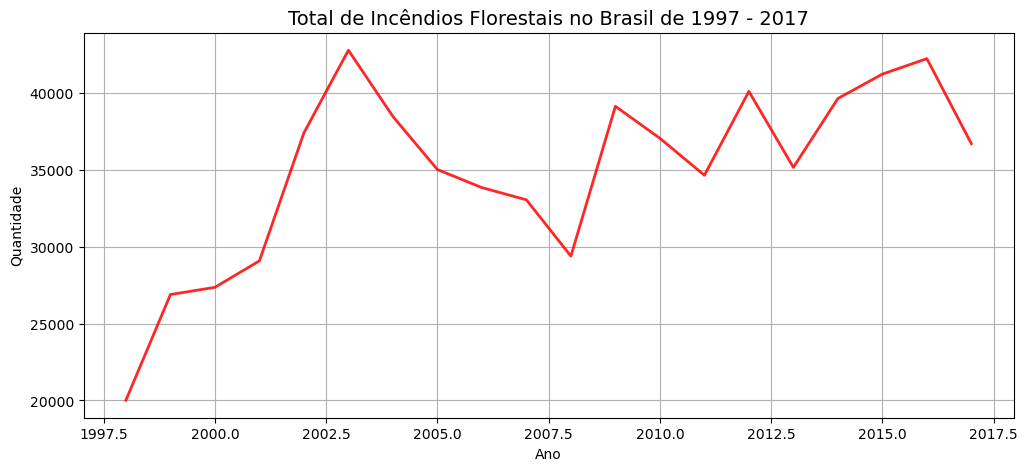

In [8]:
# Tamanho
plt.figure(figsize = (12, 5))

# Grafico
sns.lineplot(data = total_incendios_ano, x = 'year', y = 'number', estimator = 'sum',
            lw = 2, color = 'red', alpha = 0.85)

# Labels
plt.title('Total de Incêndios Florestais no Brasil de 1997 - 2017', fontsize = 14)
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid()
plt.show();

In [9]:
# Soma do total de incendios por ano e mês
total_incendios_ano_mes = df.groupby(['year', 'month'])['number'].sum().reset_index()
total_incendios_ano_mes.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


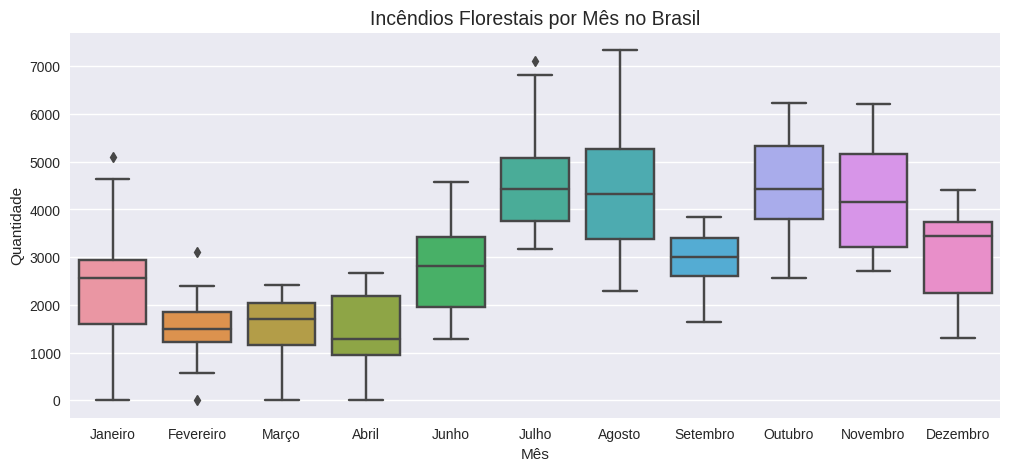

In [10]:
# Análise por mês
plt.figure(figsize = (12, 5))

plt.style.use('seaborn')

sns.boxplot(data = total_incendios_ano_mes, x = 'month', y = 'number',
            order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Junho',
            'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Titulo
plt.title('Incêndios Florestais por Mês no Brasil', fontsize = 14)

# Labels
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.show();

In [11]:
# Total de incendios por estado
total_incendios_estado = df.groupby('state')['number'].sum().reset_index().sort_values('number', ascending = False)
total_incendios_estado.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


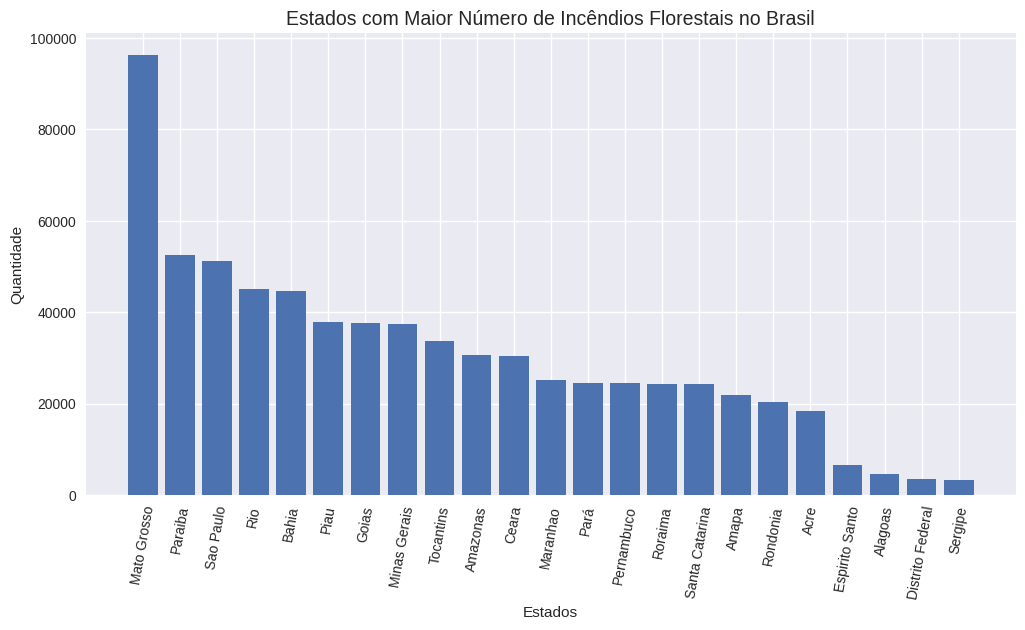

In [13]:
# Tamanho
plt.figure(figsize = (12, 6))

# Gráfico
plt.bar(total_incendios_estado['state'], total_incendios_estado['number'])

# Titulo
plt.title('Estados com Maior Número de Incêndios Florestais no Brasil', fontsize = 14)

# Labels
plt.ylabel('Quantidade')
plt.xlabel('Estados')
plt.xticks(rotation = 80)

plt.show();

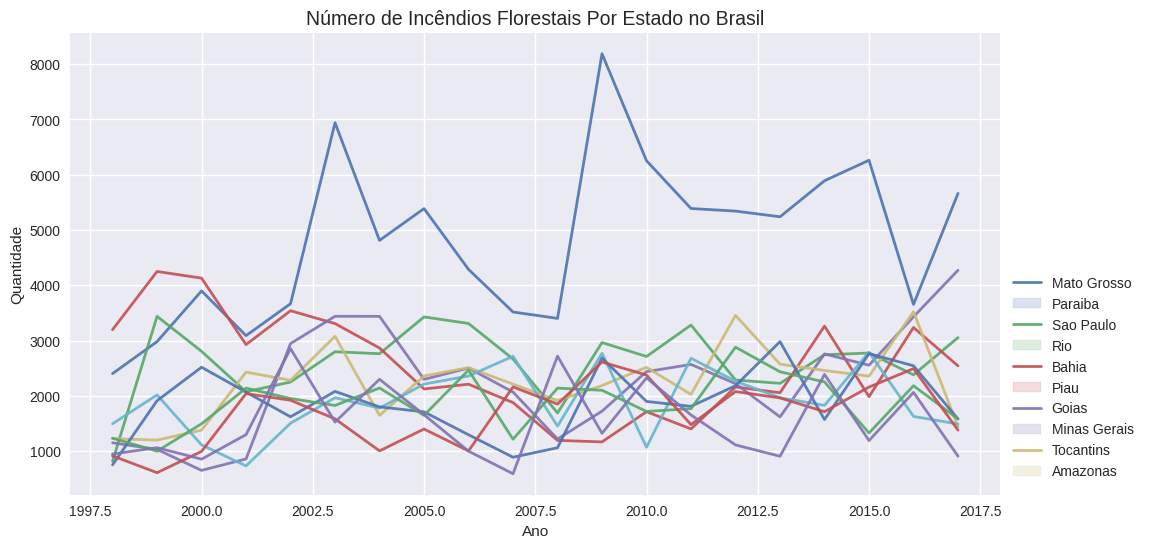

In [37]:
# 10 estado com maior numero de estados
top_10_estados = total_incendios_estado['state'][0:10].values

# Tamanho
plt.figure(figsize = (12, 6))

# Titulo
plt.title('Número de Incêndios Florestais Por Estado no Brasil', fontsize = 14)

for i in top_10_estados:
    # Filtrando por estado
    estado = df.loc[df['state'] == i]
    
    # Somando o total de incendios por ano
    estado_por_ano = estado.groupby('year')['number'].sum().reset_index()
    
    # Gráfico
    sns.lineplot(data = estado_por_ano, x = 'year', y = 'number', lw = 2, alpha = 0.90)

# Labels
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Leganda
plt.legend(top_10_estados, bbox_to_anchor = (1, 0.5))

plt.show();